<a href="https://colab.research.google.com/github/vchandraiitk/airflow/blob/main/Vikas_M3_MP4_NB_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1bJXXxoH5-wZbG0cXDDJUkzFUO564A2XG/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import os
os.chdir('/content/drive/MyDrive/ISC/MiniProject/M3_MP4_NB_Employee_Attrition_Prediction')

In [100]:
#@title Download the data
#!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [101]:
!pip -qq install catboost

### Import Required Packages

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [103]:
# read the dataset
# YOUR CODE HERE
df_attrition_train = pd.read_csv('hr_employee_attrition_train.csv')

In [104]:
# Check the shape of dataframe.
# YOUR CODE HERE
df_attrition_train.shape

(1170, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [105]:
# YOUR CODE HERE
#Check for missing values
numerical = df_attrition_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df_attrition_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", numerical)
print("Categorical Columns:", categorical)

Numerical Columns: ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical Columns: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

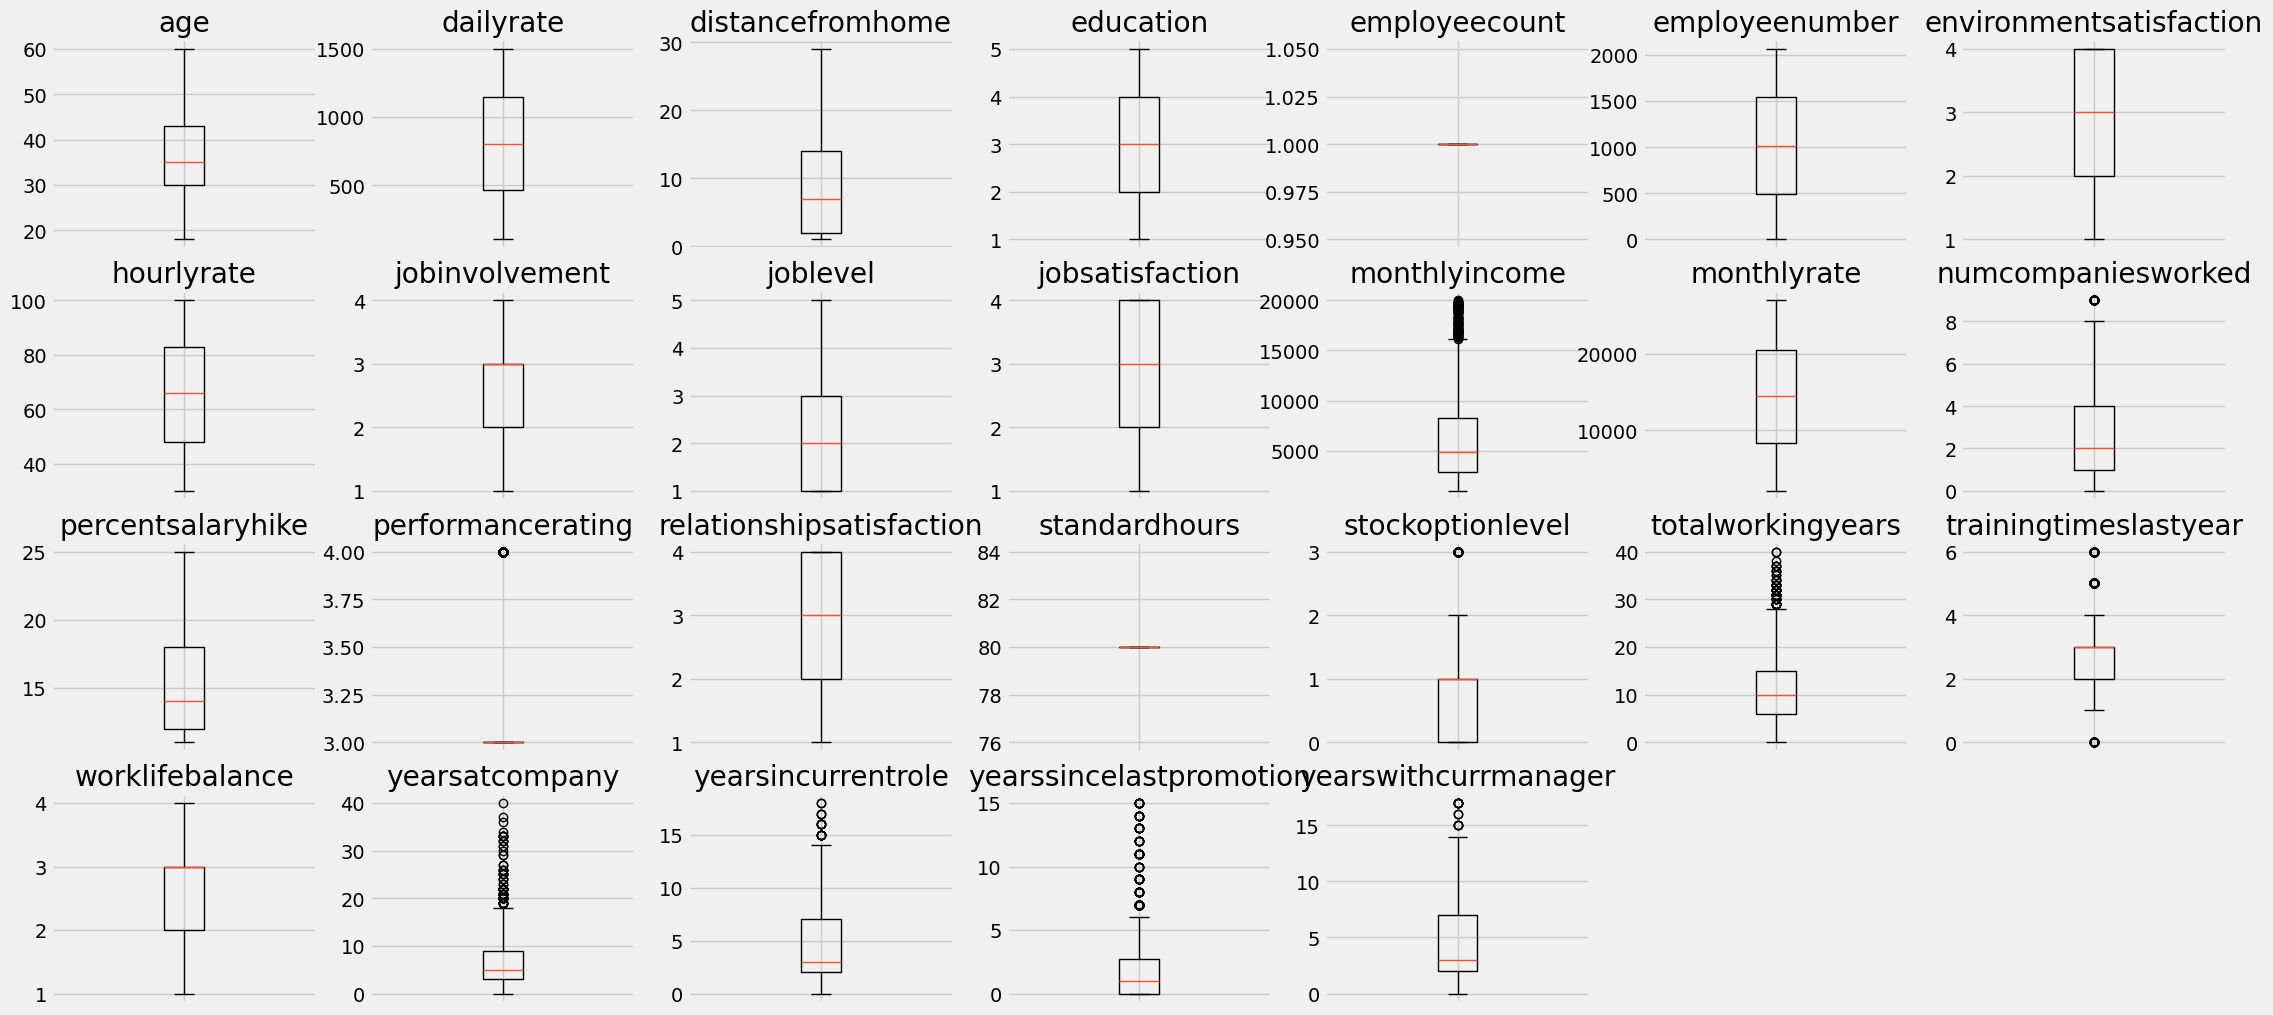

In [106]:
# Check for outliers
# YOUR CODE HERE
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical):
    plt.subplot(5, 7, i+1)
    plt.boxplot(df_attrition_train[col])
    plt.title(col)
    plt.xticks([1], [''])


### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [107]:
# YOUR CODE HERE
def calculate_iqr_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Removing outliers based on IQR for each numerical column
#data_without_outliers = df_attrition_train.copy()
for col in numerical:
    lower_bound, upper_bound = calculate_iqr_bounds(df_attrition_train[col])
    #print(data_without_outliers[col])
    #print(data_without_outliers[col])
    df_attrition_train = df_attrition_train[
        (df_attrition_train[col] >= lower_bound) &
        (df_attrition_train[col] <= upper_bound)
    ]

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [108]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df_attrition_train.attrition.value_counts()

,count
attrition,
No,426
Yes,93


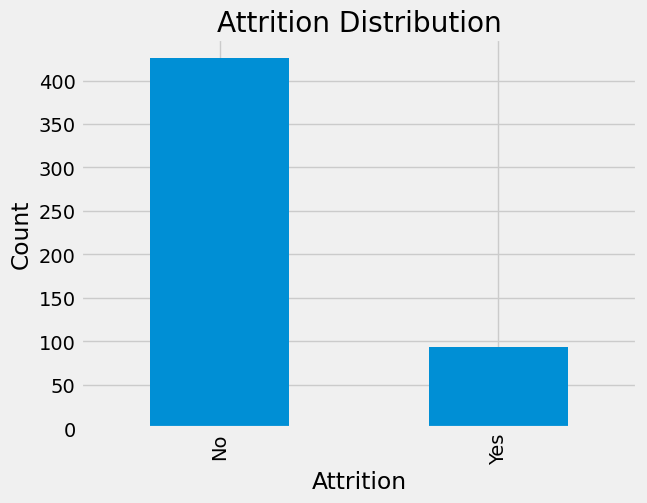

In [109]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
df_attrition_train.attrition.value_counts().plot(kind='bar')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()  # Display the plot

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [110]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
#sns.pairplot(df_attrition_train, hue='attrition')
#plt.show()

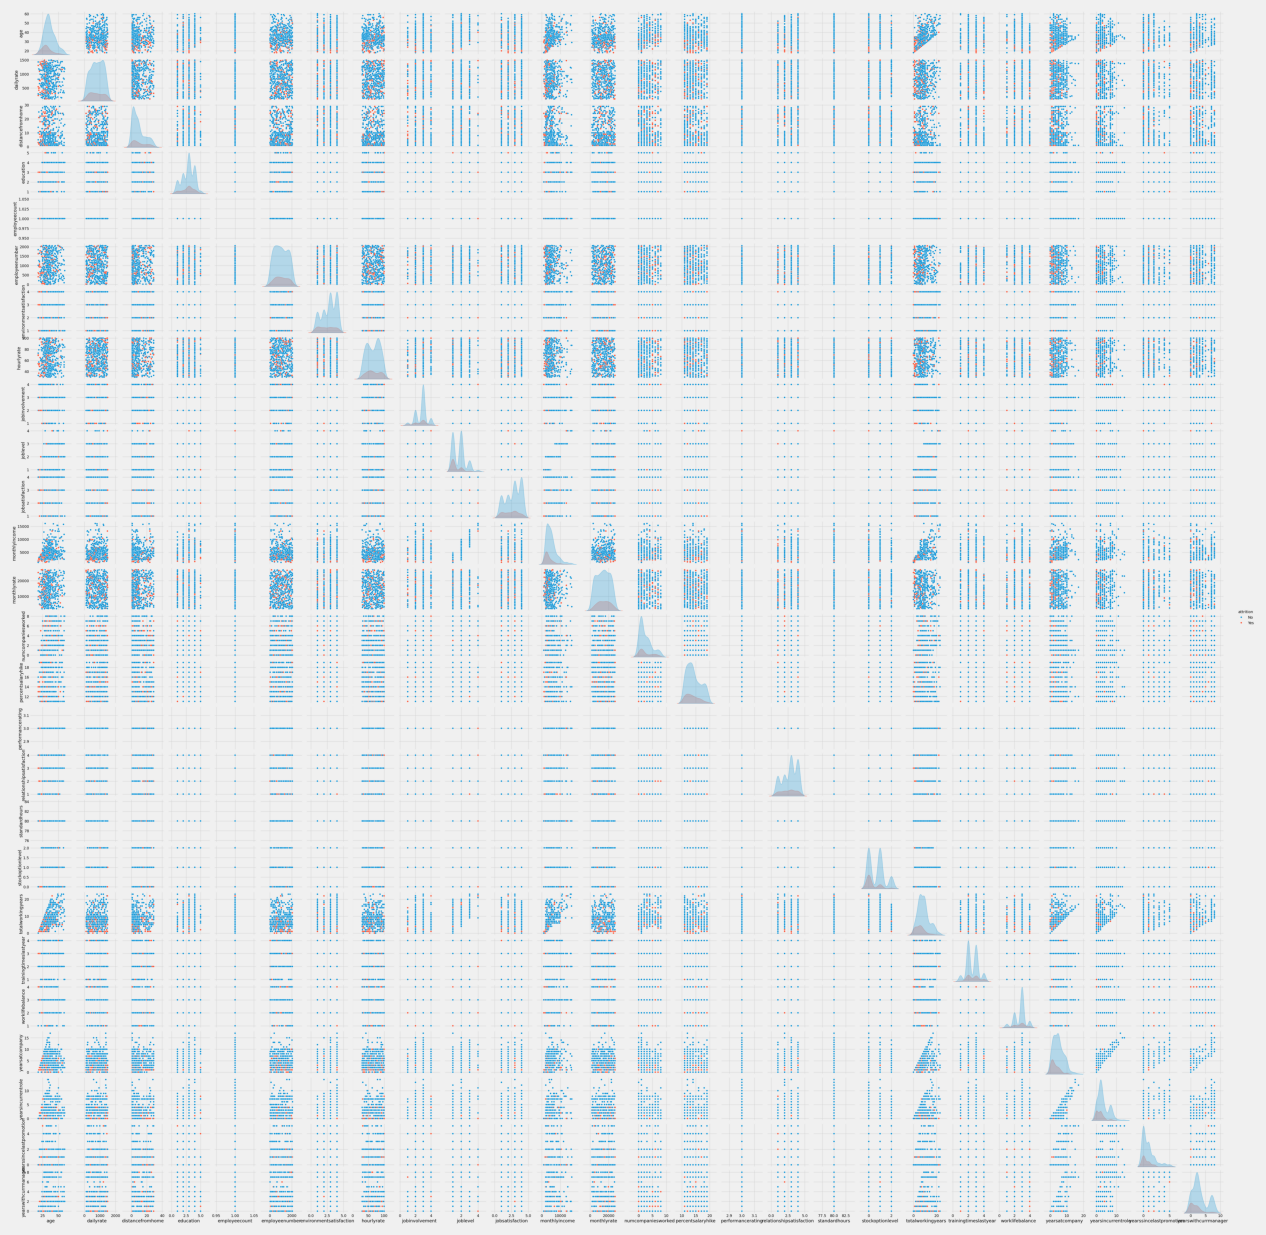

In [111]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the image file in Google Drive
image_path = '/content/drive/MyDrive/ISC/MiniProject/M3_MP4_NB_Employee_Attrition_Prediction/pairplot.png'  # Replace with your image path

# Open and display the image
image = Image.open(image_path)
plt.figure(figsize=(25, 15))
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

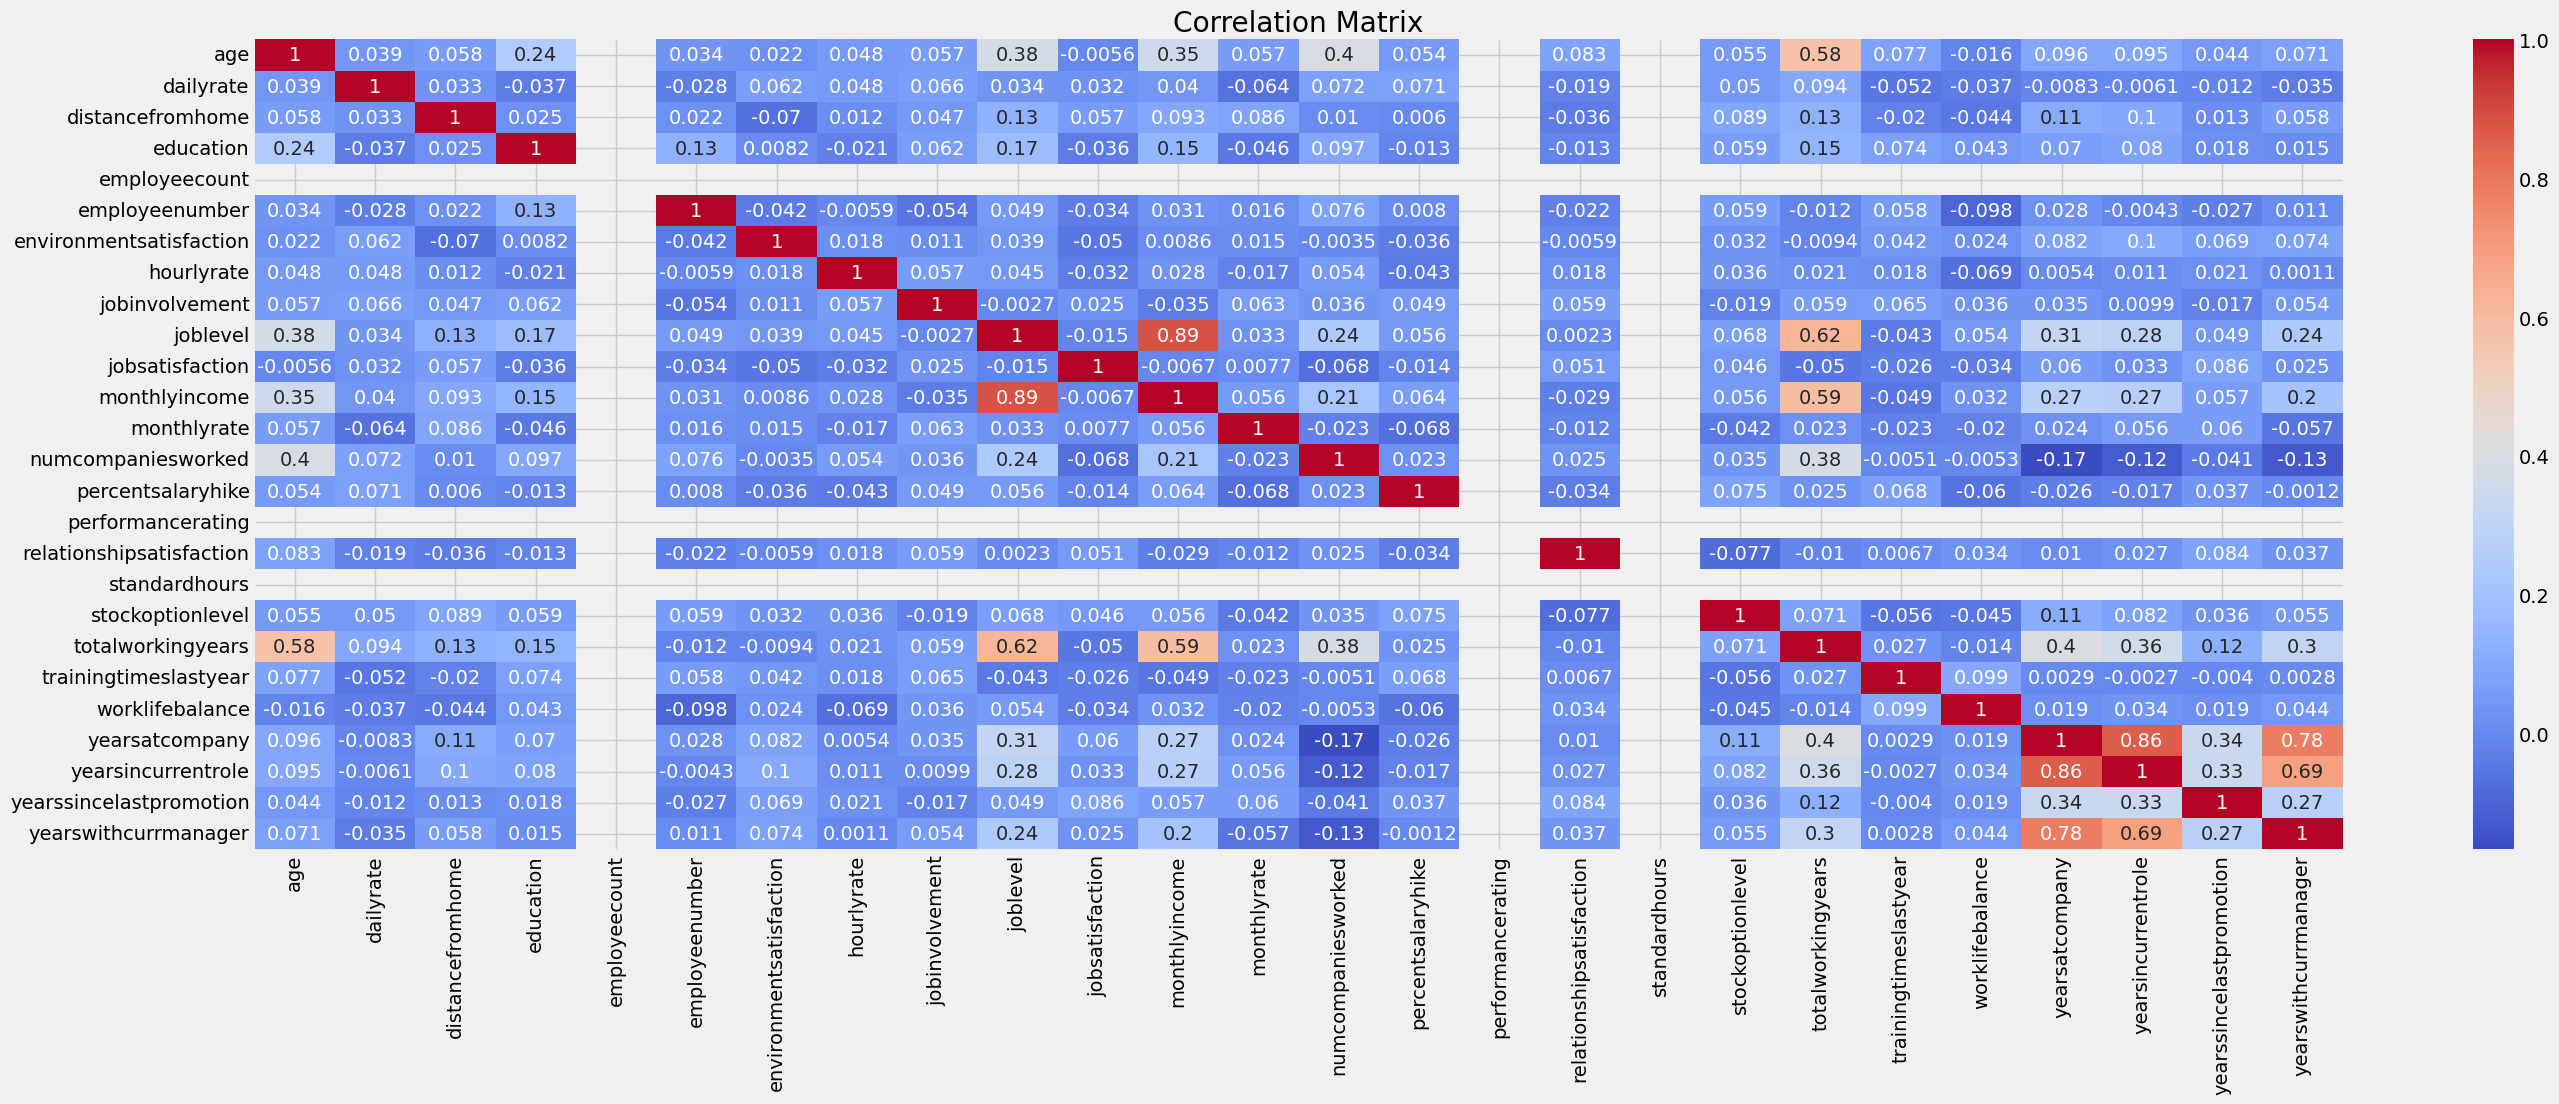

In [112]:
# Visualize heatmap
# YOUR CODE HERE
# Plot the correlation matrix
df_numerical = df_attrition_train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(30, 10))
correlation_matrix = df_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_attrition_train[numerical] = scaler.fit_transform(df_attrition_train[numerical])

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning (CDS-B4 GDrive -> Module 2 -> Assignments -> Mar 04)

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [114]:
# Copy the data
# YOUR CODE HERE
df_catboost = df_attrition_train.copy()
X = df_catboost.drop(columns=['attrition'])

In [115]:
# Target Column
# YOUR CODE HERE
y = df_catboost['attrition']

In [116]:
# Feature Space
# YOUR CODE HERE
X = df_attrition_train.drop('attrition', axis=1)
X.head(1)

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,1.134332,Travel_Rarely,-0.626627,Research & Development,1.903322,-0.839063,Life Sciences,0.0,1.44344,-0.681063,Female,1.337504,-1.095319,0.466448,Manufacturing Director,1.168511,Married,0.400446,1.383426,-1.12061,Y,No,-0.476268,0.0,1.167485,0.0,2.012247,0.372949,-0.71014,-1.025624,1.428448,1.863929,1.778076,2.127143


### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [117]:
y = y.map({'Yes': 1, 'No': 0})
y.value_counts()

,count
attrition,
0,426
1,93


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
categorical.remove('attrition')
categorical_features_indices = [X.columns.get_loc(col) for col in categorical]

In [119]:
# Create CatBoost model
# YOUR CODE HERE
# Define the CatBoost model with relevant parameters
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features_indices,
    verbose=100,
    early_stopping_rounds=50
)

In [120]:
# Model training
# YOUR CODE HERE
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

0:	learn: 0.6238278	total: 21.2ms	remaining: 21.2s
100:	learn: 0.0563973	total: 1.71s	remaining: 15.2s
200:	learn: 0.0165976	total: 4.04s	remaining: 16.1s
300:	learn: 0.0083693	total: 6.26s	remaining: 14.5s
400:	learn: 0.0053074	total: 8.06s	remaining: 12s
500:	learn: 0.0038363	total: 9.66s	remaining: 9.63s
600:	learn: 0.0029891	total: 11.3s	remaining: 7.48s
700:	learn: 0.0024728	total: 12.8s	remaining: 5.48s
800:	learn: 0.0020864	total: 14.7s	remaining: 3.65s
900:	learn: 0.0018360	total: 17.1s	remaining: 1.87s
999:	learn: 0.0016434	total: 18.9s	remaining: 0us


### Model performance

In [121]:
# Model performance on all sets
# YOUR CODE HERE
oc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"ROC AUC: {oc_auc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

ROC AUC: 0.7461300309597523
Accuracy: 0.8269230769230769
F1 Score: 0.25


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [122]:
# Copy dataframe
# YOUR CODE HERE
df_xgboost = df_attrition_train.copy()

In [123]:
df_xgboost.shape

(519, 35)

**Hint:** Use pd.get_dummies

In [124]:
# Handling categorical features
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoders = {}
categorical_columns = categorical

In [125]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE
for col in categorical_columns:
    le = LabelEncoder()
    df_xgboost[col] = le.fit_transform(df_xgboost[col])
    label_encoders[col] = le

df_xgboost.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,attrition
0,1.134332,2,-0.626627,1,1.903322,-0.839063,1,0.0,1.443440,-0.681063,0,1.337504,-1.095319,0.466448,4,1.168511,1,0.400446,1.383426,-1.120610,0,0,-0.476268,0.0,1.167485,0.0,2.012247,0.372949,-0.71014,-1.025624,1.428448,1.863929,1.778076,2.127143,No
1,-0.119473,2,0.410085,1,-0.173222,-0.839063,3,0.0,-0.454779,-0.681063,0,1.483593,0.340213,0.466448,0,0.259280,2,0.486167,-1.000781,0.236147,0,0,-1.288035,0.0,1.167485,0.0,-0.921338,0.372949,-0.71014,0.353389,0.154626,-0.739552,2.615482,0.096261,No
2,0.450439,2,-1.117438,1,1.659023,0.132977,3,0.0,0.473351,0.234667,1,1.337504,0.340213,-0.909044,6,-1.559183,2,-0.326728,1.133292,-1.120610,0,0,-0.476268,0.0,-1.646406,0.0,-0.921338,-0.442901,-0.71014,0.353389,0.154626,-0.367626,-0.734142,0.096261,Yes
5,-0.689384,2,-0.997240,1,1.903322,2.077056,5,0.0,-0.777023,0.234667,0,0.266187,-1.095319,-0.909044,6,-0.649952,1,-0.819985,0.577343,1.140652,0,0,0.741382,0.0,-0.708443,0.0,-0.921338,-0.442901,-0.71014,1.732401,-0.800741,-0.367626,0.103264,-0.716091,Yes
6,2.502119,2,-0.533974,1,-1.028269,1.105016,3,0.0,-0.916327,1.150397,1,1.094023,0.340213,0.466448,0,0.259280,1,0.708823,-1.634482,-0.216105,0,0,-1.288035,0.0,0.229521,0.0,-0.921338,1.392762,-0.71014,0.353389,-0.482285,-0.367626,0.103264,-0.309915,No


When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [126]:
# Rename target column
# YOUR CODE HERE
df_xgboost.rename(columns={'attrition': 'target'}, inplace=True)
df_xgboost.head()

,age,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,target
0,1.134332,2,-0.626627,1,1.903322,-0.839063,1,0.0,1.443440,-0.681063,0,1.337504,-1.095319,0.466448,4,1.168511,1,0.400446,1.383426,-1.120610,0,0,-0.476268,0.0,1.167485,0.0,2.012247,0.372949,-0.71014,-1.025624,1.428448,1.863929,1.778076,2.127143,No
1,-0.119473,2,0.410085,1,-0.173222,-0.839063,3,0.0,-0.454779,-0.681063,0,1.483593,0.340213,0.466448,0,0.259280,2,0.486167,-1.000781,0.236147,0,0,-1.288035,0.0,1.167485,0.0,-0.921338,0.372949,-0.71014,0.353389,0.154626,-0.739552,2.615482,0.096261,No
2,0.450439,2,-1.117438,1,1.659023,0.132977,3,0.0,0.473351,0.234667,1,1.337504,0.340213,-0.909044,6,-1.559183,2,-0.326728,1.133292,-1.120610,0,0,-0.476268,0.0,-1.646406,0.0,-0.921338,-0.442901,-0.71014,0.353389,0.154626,-0.367626,-0.734142,0.096261,Yes
5,-0.689384,2,-0.997240,1,1.903322,2.077056,5,0.0,-0.777023,0.234667,0,0.266187,-1.095319,-0.909044,6,-0.649952,1,-0.819985,0.577343,1.140652,0,0,0.741382,0.0,-0.708443,0.0,-0.921338,-0.442901,-0.71014,1.732401,-0.800741,-0.367626,0.103264,-0.716091,Yes
6,2.502119,2,-0.533974,1,-1.028269,1.105016,3,0.0,-0.916327,1.150397,1,1.094023,0.340213,0.466448,0,0.259280,1,0.708823,-1.634482,-0.216105,0,0,-1.288035,0.0,0.229521,0.0,-0.921338,1.392762,-0.71014,0.353389,-0.482285,-0.367626,0.103264,-0.309915,No


In [127]:
# Feature Space
# YOUR CODE HERE
X = df_xgboost.drop(columns=['target'])

# Targer label
# YOUR CODE HERE
y = df_xgboost['target']
y = y.map({'Yes': 1, 'No': 0})
y.value_counts()

,count
target,
0,426
1,93


### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [128]:
# Create XGBoost classifier model
# YOUR CODE HERE
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the XGBClassifier model with relevant parameters
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    early_stopping_rounds=50,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [129]:
# Model training
# YOUR CODE HERE
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

[0]	validation_0-logloss:0.46917
[75]	validation_0-logloss:0.52367


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=50,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Model Performance

In [130]:
# Model performance on all sets
# YOUR CODE HERE
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

ROC AUC Score: 0.7473684210526315
Accuracy: 0.7980769230769231
F1 Score: 0.08695652173913043


## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [131]:
## Following the same procedure as followed in XGBoost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
import lightgbm as lgb

# Copy the dataframe
# YOUR CODE HERE
df_lgbm = df_attrition_train.copy()

# Handling categorical features
# YOUR CODE HERE
#df_lgbm = pd.get_dummies(df_lgbm, columns=categorical_cols, drop_first=True)


# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE
df_lgbm = pd.get_dummies(df_lgbm, columns=categorical, drop_first=True)

# Rename target column
# YOUR CODE HERE
df_lgbm.rename(columns={'attrition': 'target'}, inplace=True)

# Features Space
# YOUR CODE HERE
X = df_lgbm.drop(columns=['target'])


# Target Label
# YOUR CODE HERE
y = df_lgbm['target']
y = y.apply(lambda x: 1 if x == 'Yes' else 0)
y.value_counts()

,count
target,
0,426
1,93


### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [132]:
# Create LightGBM classifier model
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the LightGBM model with relevant parameters
model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    early_stopping_rounds=50,
    verbose=-1  # Suppress LightGBM output
)

In [133]:
# Model training
# YOUR CODE HERE
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')


LGBMClassifier(early_stopping_rounds=50, max_depth=6, n_estimators=1000,
               verbose=-1)

### Model performance

In [134]:
# Model performance on all sets
# YOUR CODE HERE
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"ROC AUC Score: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

ROC AUC Score: 0.7009287925696595
Accuracy: 0.8173076923076923
F1 Score: 0.09523809523809525


## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [96]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE
results_df = pd.DataFrame({
    'Model': ['XGBoost', 'CatBoost'],
    'ROC AUC Score': [roc_auc, catboost_roc_auc],
    'Accuracy': [xgb_accuracy, catboost_accuracy],
    'F1 Score': [xgb_f1, catboost_f1]
})

NameError: name 'catboost_roc_auc' is not defined

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

## Kaggle Prediction

Load data from Kaggle competition site

In [ ]:
# From the given Kaggle competition link, load the dataset 'hr_employee_attrition_test.csv'
# YOUR CODE HERE

In [ ]:
# From the dataset 'hr_employee_attrition_test.csv', drop columns ['id','employeenumber', 'employeecount', 'over18'] having single value
# YOUR CODE HERE

In [ ]:
# Handle categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

Predictions

In [ ]:
# Get the predictions using your already trained CatBoost classifier model achieved in Exercise 9
# YOUR CODE HERE

In [ ]:
# Get the predictions using your already trained XGBoost classifier model achieved in Exercise 11
# YOUR CODE HERE

Get the predictions using your trained Microsoft LightGBM model (Optional)

In [ ]:
# Get the predictions using your already trained Microsoft LightGBM classifier model
# achieved under the optional exercise 'Apply LightGBM (Optional)'
# YOUR CODE HERE

Save predictions to csv and submit under given Kaggle competiton link

In [ ]:
# YOUR CODE HERE